# Bioinformatics survey - skills analysis

In [28]:
from typing import Dict, Set

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

import sys
import os

## Define path to data and constant variables

In [2]:
# paths
data_path = "./data"
# constant variables
SURVEY_CSV = "BioinformaticsSurvey2022.csv"

## Define functions used throughout the analysis

In [20]:
def compute_average_score(
    df: pd.DataFrame, elements: Set, term: str
) -> Dict[str, Dict[str, float]]:
    assert isinstance(df, pd.DataFrame)
    assert isinstance(elements, set)
    assert isinstance(term, str)
    score_dict = {}
    for e in elements:
        subset_e = df[df[term] == e]
        cols = subset_e.columns.tolist()[2:]
        score_dict[e] = {}
        for col in cols:
            avg_score = np.mean(
                [
                    int(val) 
                    for val in subset_e[col].tolist() 
                    if str(val) != "nan" 
                ]
            )
            score_dict[e][col] = avg_score
    return score_dict

## Start the analysis

In [4]:
survey = pd.read_csv(os.path.join(data_path, SURVEY_CSV))
survey.head()

,Timestamp,How old are you?,What are your pronouns?,Where are you from?,Where in Italy are you studying/did you study?,Are you an off-site student?,What is your current position?,Is bioinformatics the main focus of your studies?,What is your current degree area? Please select the closest answer that applies.,Have you ever heard about bioinformatics?,...,"On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Science Communication]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Teaching]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Entrepreneurship]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Editorial and publishing services]",Where in the world do you see yourself working? Select one or multiple answers.,Do you think that a mentoring program could help you in better design your career path?,How did you come across this survey?,Had you heard about ISCB before this survey?,Had you heard about RSG-Italy before this survey?,Your comments/advice:
0,2022/03/24 4:42:29 pm CET,23-26,He/him,"Northern-West Italy (Valle d'Aosta, Liguria, L...","Northern-West Italy (Valle d'Aosta, Liguria, L...",No,Master's student,Yes,NaN,NaN,...,1.0,1.0,1.0,1.0,Italy;Europe;North America,"Yes, I feel confused about job opportunities",RSG-Italy Telegram channel,Yes,Yes,NaN
1,2022/03/24 4:44:54 pm CET,23-26,He/him,"Northern-East Italy (Trentino-Alto Adige, Vene...","Northern-East Italy (Trentino-Alto Adige, Vene...",Yes,Master's student,No,Computer Science,"Yes, I'm familiar with the term",...,NaN,NaN,NaN,NaN,NaN,NaN,RSG-Italy Telegram channel,No,Yes,"In my opinion, there should be more bachelors ..."
2,2022/03/24 4:52:42 pm CET,23-26,He/him,"Northern-West Italy (Valle d'Aosta, Liguria, L...","Northern-East Italy (Trentino-Alto Adige, Vene...",No,PhD student (either in academia or industry),Yes,NaN,NaN,...,4.0,3.0,3.0,3.0,Italy;Europe;North America,"No, I think I will figure it out as I gain exp...",From friends/colleagues,Yes,Yes,NaN
3,2022/03/24 4:54:39 pm CET,23-26,She/her,"Southern Italy (Abruzzo, Molise, Campania, Pug...","Northern-East Italy (Trentino-Alto Adige, Vene...",Yes,Master's student,Yes,NaN,NaN,...,1.0,2.0,2.0,1.0,Italy;Europe;North America;Oceania,"Yes, I feel confused about job opportunities",RSG-Italy Telegram channel,Yes,Yes,NaN
4,2022/03/24 5:08:20 pm CET,27-30,He/him,"Northern-East Italy (Trentino-Alto Adige, Vene...","Northern-East Italy (Trentino-Alto Adige, Vene...",No,PhD student (either in academia or industry),Yes,NaN,NaN,...,1.0,1.0,3.0,1.0,Europe;North America,"No, I think I will figure it out as I gain exp...",RSG-Italy Telegram channel,Yes,Yes,NaN


In [5]:
# subset the survey to consider only skills data
survey_skills = survey.iloc[:, [25, 26] + list(range(36, 62))]
# rename skill columns
cols = survey_skills.columns.tolist()
skill_cols = cols[2:]
columns = [col.split("[")[1].replace("]", "") for col in skill_cols]
survey_skills.columns = ["University", "Degree class"] + columns
survey_skills.head()


,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet",5,...,"I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
3,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,"I do not know, I have not finished my studies yet",1,2,1,1,1,1,5,3,1
4,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2


In [6]:
# remove rows with all nan values
survey_skills.dropna(axis=0, how="all", inplace=True)
survey_skills.reset_index(drop=True, inplace=True)
survey_skills.head()

<ipython-input-6-534be85faafd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  survey_skills.dropna(axis=0, how="all", inplace=True)


,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet",5,...,"I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet"
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,"I do not know, I have not finished my studies yet",1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


In [11]:
# change str answers to nan
def convert_to_nan(row: pd.Series) -> pd.Series:
    row[row == "I do not know, I have not finished my studies yet"] = np.nan
    row[row == "do not know, I have not finished my studies yet"] = np.nan
    return row
survey_skills = survey_skills.apply(lambda x : convert_to_nan(x), axis=0)
survey_skills.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


In [25]:
# remove universities with less than 4 answers
universities = set(survey_skills["University"].tolist())
remove_unis = [
    uni 
    for uni in universities 
    if survey_skills[survey_skills["University"] == uni].shape[0] < 4
]
survey_skills_uni = survey_skills.copy()
survey_skills_uni = survey_skills_uni[~survey_skills_uni["University"].isin(remove_unis)]
survey_skills_uni.reset_index(drop=True, inplace=True)
survey_skills_uni.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


In [29]:
# compute average score per affiliation
universities = set(survey_skills_uni["University"].tolist())
survey_skills_uni = pd.DataFrame(compute_average_score(survey_skills_uni, universities, "University"))
survey_skills_uni

,University of Trento,University of Salerno,I’m not currently studying,University of Verona,University of Roma Tor Vergata,University of Milano Bicocca,University of Bologna,University of Bari,University of Milano La Statale,Other Italian university,"I’m doing my bachelor’s, master’s, or PhD programme abroad"
Analysis of genomics data,3.692308,3.000000,2.666667,3.391304,3.000000,1.50,3.00,3.785714,3.411765,4.000000,3.285714
Analysis of metabolomics data,2.076923,2.750000,2.000000,2.428571,1.875000,1.50,1.20,2.642857,1.941176,3.000000,1.714286
Analysis of proteomics data,2.076923,3.750000,2.333333,2.863636,2.625000,1.50,1.80,3.000000,2.352941,2.714286,2.285714
Analysis of transcriptomics data,3.615385,2.750000,2.666667,3.000000,2.800000,1.50,2.40,3.642857,3.647059,3.428571,3.571429
Artificial intelligence (machine learning and deep learning),3.769231,1.750000,3.000000,3.250000,1.625000,1.00,2.60,4.357143,2.647059,3.600000,2.571429
"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",3.615385,3.500000,2.500000,3.652174,3.500000,1.75,3.40,3.785714,3.117647,3.400000,3.571429
"Containers usage (Docker, Singularity, …)",1.153846,1.000000,1.500000,1.954545,1.125000,1.00,1.60,1.307692,1.666667,1.857143,1.285714
Data FAIRness,1.000000,1.000000,2.000000,2.050000,2.000000,1.25,1.50,1.615385,1.533333,1.571429,1.285714
Database development,1.923077,3.500000,2.333333,3.833333,2.857143,1.25,1.80,3.714286,2.294118,3.428571,1.428571
Drug design & development,2.153846,2.333333,2.166667,1.952381,2.625000,1.75,2.00,2.000000,2.437500,2.428571,1.714286


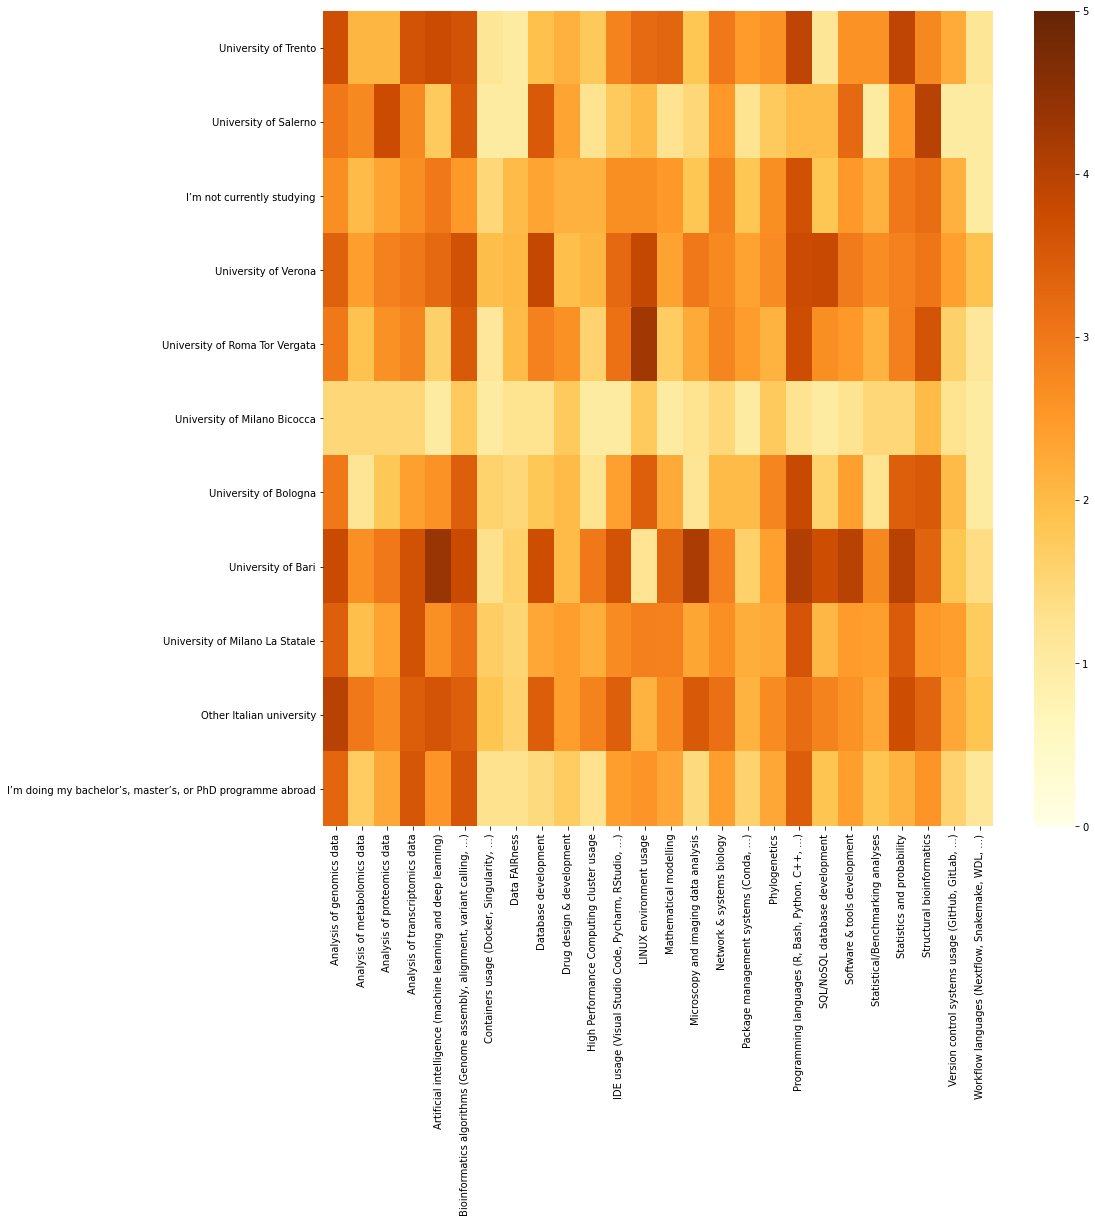

In [59]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(
    survey_skills_uni.T, vmin=0, vmax=5, cmap="YlOrBr", ax=ax
)

<Figure size 1080x1080 with 0 Axes>

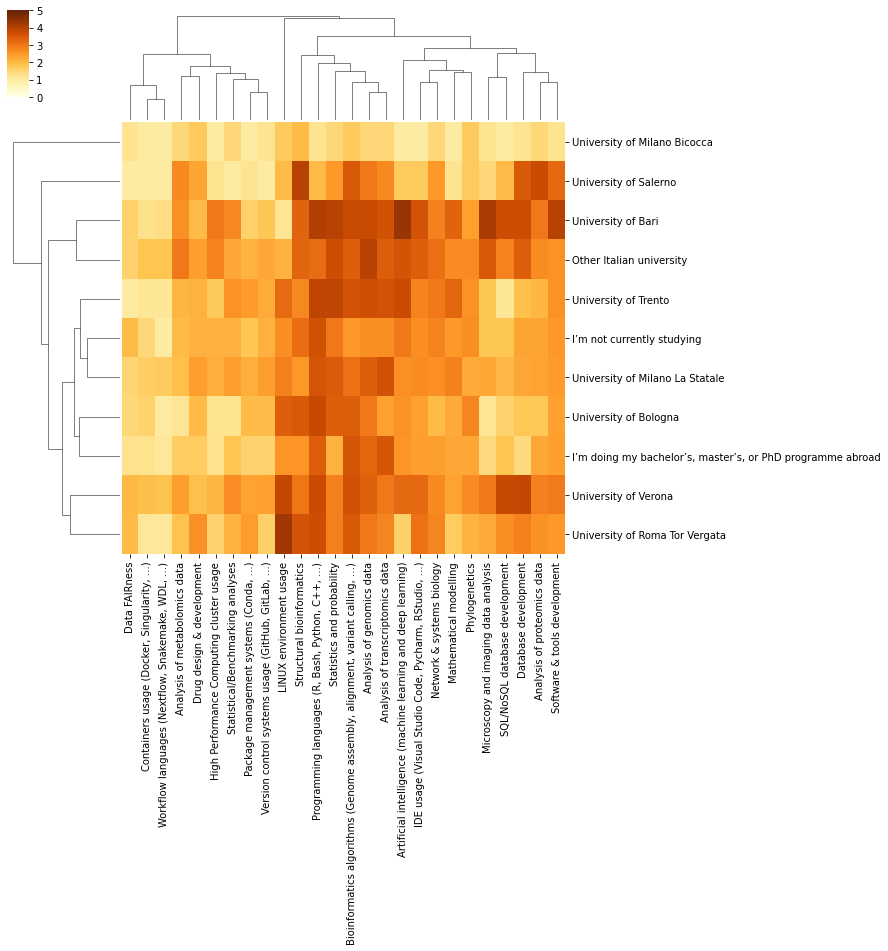

In [58]:
plt.figure(figsize=(15, 15))
ax = sns.clustermap(
    survey_skills_uni.T, vmin=0, vmax=5, cmap="YlOrBr"
)

In [64]:
# remove degree class with less than 4 answers
degrees = set(survey_skills["Degree class"].tolist())
survey_skills_degree = survey_skills.copy()
survey_skills_degree = survey_skills_degree[survey_skills_degree["Degree class"].notna()]
survey_skills_degree.reset_index(drop=True, inplace=True)
survey_skills_degree.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


In [65]:
# compute average score per degree class
degrees = set(survey_skills_degree["Degree class"].tolist())
survey_skills_degree = pd.DataFrame(compute_average_score(survey_skills_degree, degrees, "Degree class"))
survey_skills_degree

,"LM-8 Biotecnologie industriali (Trento, Milano)",L-02 Biotecnologie (Rome La Sapienza),LM-18 Informatica (Verona),"LM-6 Biologia (Roma Tor Vergata, Bologna)",Other,L-31Scienze e tecnologie informatiche (Verona),LM-9 Biotecnologie mediche e farmaceutiche (Milano)
Analysis of genomics data,3.520000,3.500000,3.312500,2.476190,3.475000,3.500000,3.000000
Analysis of metabolomics data,2.040000,1.500000,2.384615,1.631579,2.414634,3.000000,1.833333
Analysis of proteomics data,2.040000,1.666667,2.571429,2.473684,2.878049,3.250000,2.166667
Analysis of transcriptomics data,3.600000,3.833333,2.866667,2.333333,3.325000,3.250000,3.333333
Artificial intelligence (machine learning and deep learning),3.160000,2.500000,3.437500,2.263158,3.333333,2.500000,2.166667
"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",3.360000,3.333333,3.875000,2.904762,3.342105,3.750000,2.833333
"Containers usage (Docker, Singularity, …)",1.478261,1.166667,1.937500,1.473684,1.432432,2.333333,1.666667
Data FAIRness,1.217391,1.333333,1.857143,1.944444,1.702703,2.000000,1.000000
Database development,1.840000,1.500000,4.187500,2.000000,3.292683,3.000000,1.833333
Drug design & development,2.416667,2.333333,1.714286,2.333333,1.973684,2.750000,2.500000


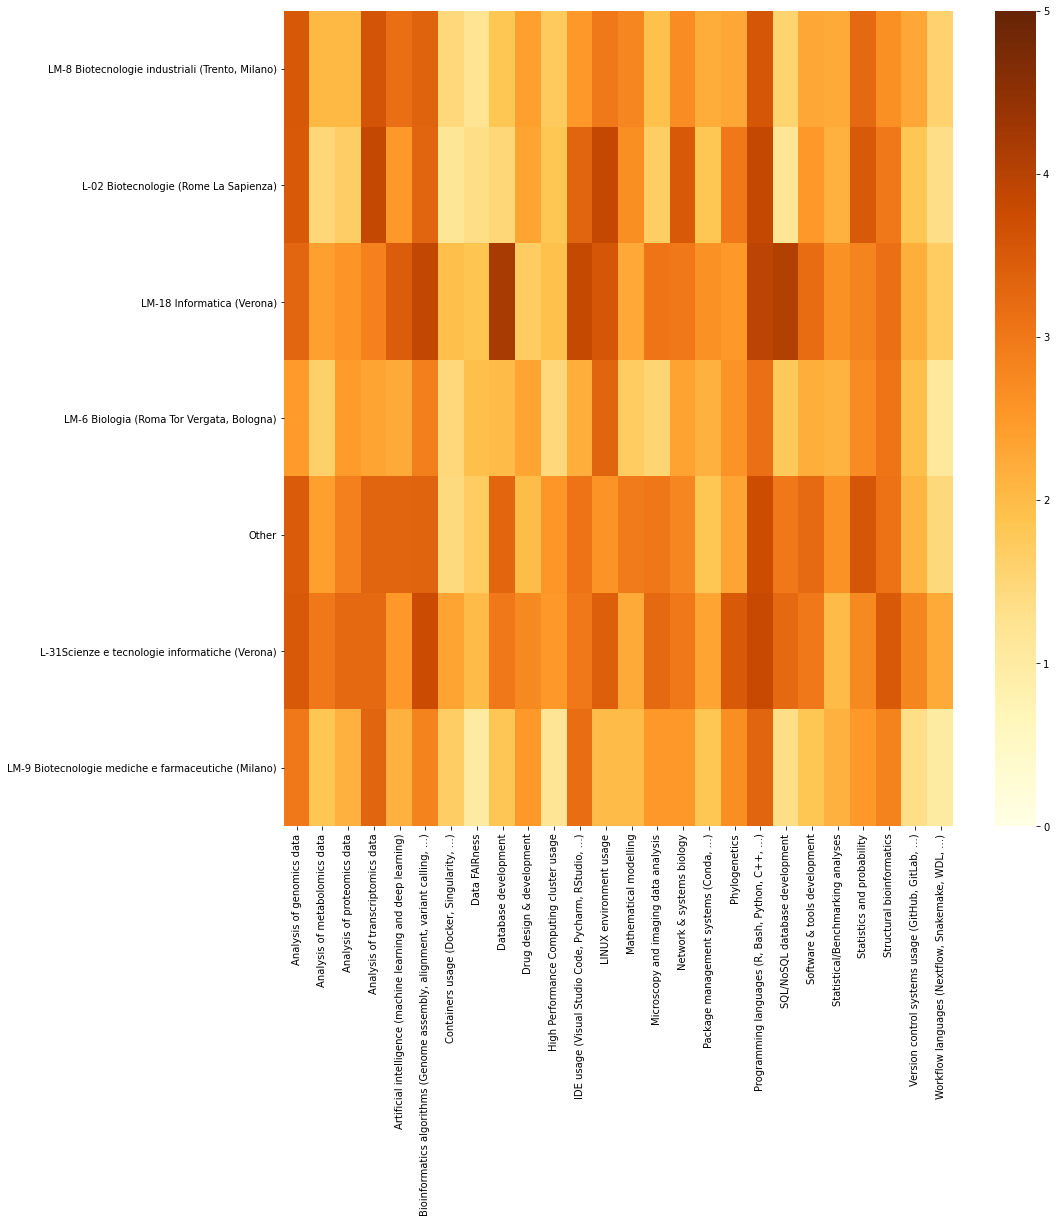

In [66]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(
    survey_skills_degree.T, vmin=0, vmax=5, cmap="YlOrBr", ax=ax
)

<Figure size 1080x1080 with 0 Axes>

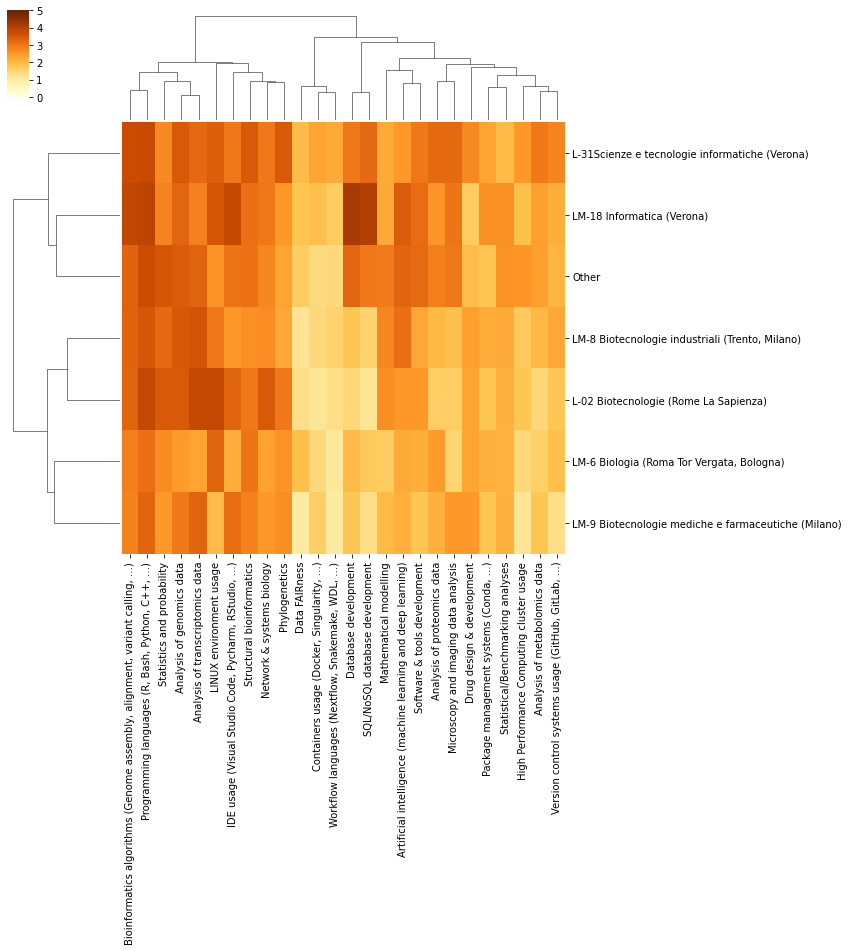

In [67]:
plt.figure(figsize=(15, 15))
ax = sns.clustermap(
    survey_skills_degree.T, vmin=0, vmax=5, cmap="YlOrBr"
)

In [70]:
# analyze subjects areas
for x in survey_skills.columns: print(x)

University
Degree class
Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)
Analysis of genomics data
Analysis of transcriptomics data
Analysis of proteomics data
Analysis of metabolomics data
Structural bioinformatics
Database development
Microscopy and imaging data analysis
Network & systems biology
Phylogenetics
Drug design & development
Mathematical modelling
Software & tools development
Statistics and probability
Artificial intelligence (machine learning and deep learning)
Programming languages (R, Bash, Python, C++, …)
SQL/NoSQL database development
High Performance Computing cluster usage
LINUX environment usage
Version control systems usage (GitHub, GitLab, …)
Workflow languages (Nextflow, Snakemake, WDL, …)
Containers usage (Docker, Singularity, …)
Package management systems (Conda, …)
IDE usage (Visual Studio Code, Pycharm, RStudio, …)
Statistical/Benchmarking analyses
Data FAIRness
